# Modelo K-Nearest Neighbors (KNN)

En este notebook veremos cómo funciona el modelo **KNN (Vecinos más cercanos)** tanto en **clasificación** como en **regresión**.

El algoritmo **no asume una forma funcional** (es *no paramétrico*) y predice basándose en la proximidad de los puntos:
- En **clasificación**, asigna la clase más frecuente entre los *K* vecinos.
- En **regresión**, promedia los valores de los *K* vecinos.

Trabajaremos con dos ejemplos:
1. Clasificación con datos sintéticos (2 clases).
2. Regresión sobre una función cuadrática con ruido.


In [1]:
# ============================================================
# Importar librerías necesarias
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [13]:
# ============================================================
# Crear datos sintéticos para clasificación
# ============================================================

# Generamos un conjunto con 2 variables y 2 clases bien separadas
X, y = make_classification(
    n_samples=1000,      # más muestras
    n_features=2,        # dos variables para graficar
    n_redundant=0,
    n_clusters_per_class=2,  # más de un grupo por clase → genera complejidad
    flip_y=0.05,         # 5% de etiquetas aleatorias (ruido)
    class_sep=0.8,       # menor separación entre clases → más difícil
    random_state=42
)

# Convertimos a DataFrame para inspeccionar
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['clase'] = y
df.head()


,feature_1,feature_2,clase
0,-0.559353,-0.709282,0
1,-1.222620,-1.034050,0
2,1.229643,-0.052893,0
3,-0.240040,-0.171004,1
4,-0.813770,1.439044,0


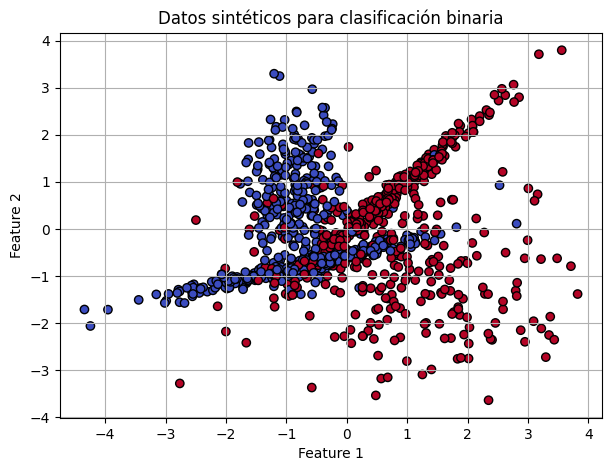

In [14]:
# ============================================================
#  Visualizar los datos generados
# ============================================================

plt.figure(figsize=(7,5))
plt.scatter(df['feature_1'], df['feature_2'], c=df['clase'], cmap='coolwarm', edgecolor='k')
plt.title("Datos sintéticos para clasificación binaria")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [15]:
# ============================================================
#  Separar los datos en entrenamiento y prueba
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (700, 2)
Tamaño prueba: (300, 2)


In [16]:
# ============================================================
#  Evaluar rendimiento para varios valores de K
# ============================================================

k_values = range(1, 21)
accuracies = []

for k in k_values:
    # Crear el modelo KNN con k vecinos
    model = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"K = {k:2d} → Precisión = {acc:.3f}")


K =  1 → Precisión = 0.830
K =  2 → Precisión = 0.850
K =  3 → Precisión = 0.850
K =  4 → Precisión = 0.867
K =  5 → Precisión = 0.843
K =  6 → Precisión = 0.860
K =  7 → Precisión = 0.870
K =  8 → Precisión = 0.850
K =  9 → Precisión = 0.860
K = 10 → Precisión = 0.857
K = 11 → Precisión = 0.860
K = 12 → Precisión = 0.857
K = 13 → Precisión = 0.863
K = 14 → Precisión = 0.860
K = 15 → Precisión = 0.863
K = 16 → Precisión = 0.857
K = 17 → Precisión = 0.857
K = 18 → Precisión = 0.860
K = 19 → Precisión = 0.863
K = 20 → Precisión = 0.860


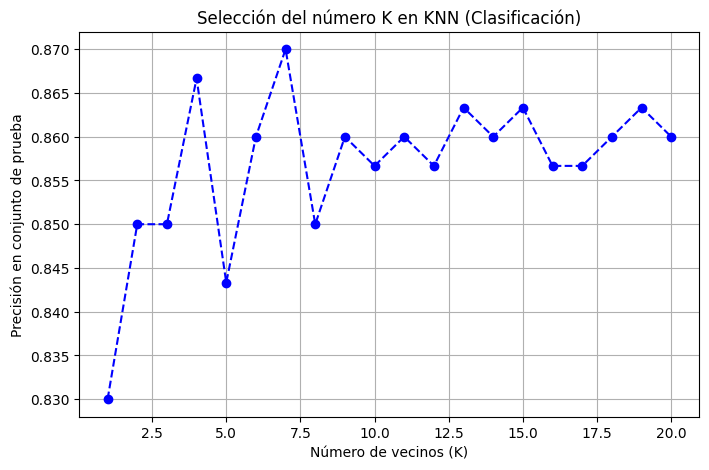

✅ Mejor valor de K = 7 con precisión de 0.870


In [17]:
# ============================================================
#  Graficar precisión vs K
# ============================================================

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='blue')
plt.title("Selección del número K en KNN (Clasificación)")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Precisión en conjunto de prueba")
plt.grid(True)
plt.show()

# Identificar el mejor K
best_k = k_values[np.argmax(accuracies)]
print(f"✅ Mejor valor de K = {best_k} con precisión de {max(accuracies):.3f}")


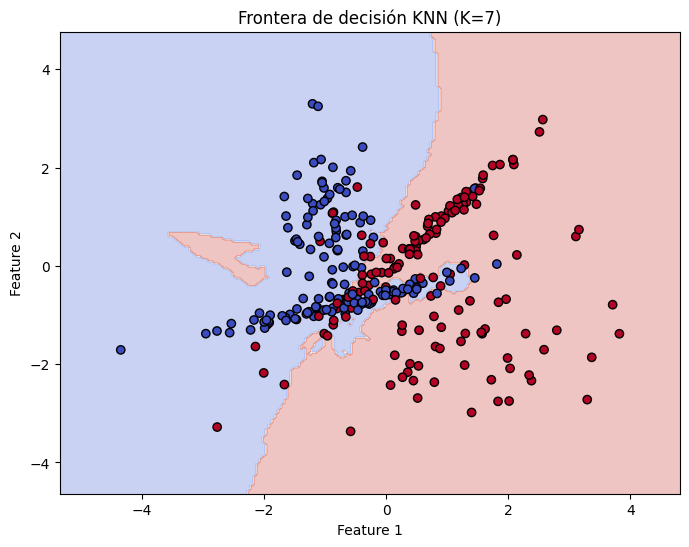

In [18]:
# ============================================================
# Visualizar la frontera de decisión con el mejor K
# ============================================================

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Crear una malla de puntos para graficar regiones de decisión
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predecir cada punto de la malla
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title(f"Frontera de decisión KNN (K={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Conclusión clasificación

- **K pequeño (1–3):** el modelo sigue demasiado los datos → **sobreajuste**.
- **K grande (15–20):** promedia en exceso → **subajuste**.
- El **K óptimo** se elige según la mayor precisión sobre el conjunto de prueba.


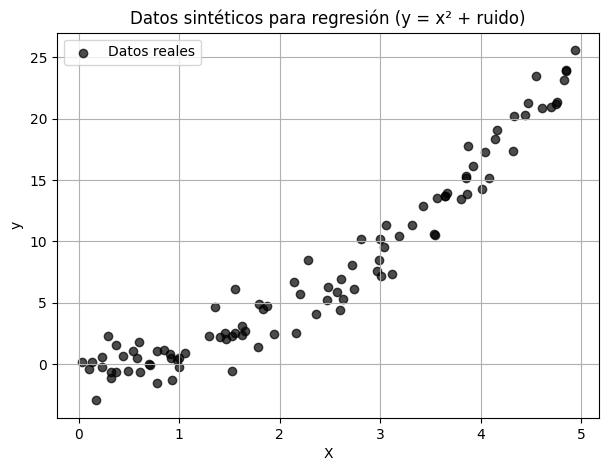

In [8]:
# ============================================================
#  Crear datos sintéticos para regresión
# ============================================================

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = X**2 + np.random.randn(100, 1) * 1.5  # función no lineal con ruido

plt.figure(figsize=(7,5))
plt.scatter(X, y, color="black", label="Datos reales", alpha=0.7)
plt.title("Datos sintéticos para regresión (y = x² + ruido)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# ============================================================
#  Separar en entrenamiento y prueba
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (80, 1)
Tamaño prueba: (20, 1)


In [10]:
# ============================================================
#  Entrenar KNN Regressor para distintos K
# ============================================================

k_values = [1, 3, 5, 10, 20]
X_plot = np.linspace(0, 5, 200).reshape(-1, 1)
predicciones = {}
errores = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predicciones para graficar la curva
    y_pred_plot = model.predict(X_plot)
    predicciones[k] = y_pred_plot

    # Evaluación sobre test
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    errores[k] = (mse, r2)

    print(f"K = {k:2d} → MSE = {mse:.3f} | R² = {r2:.3f}")


K =  1 → MSE = 2.479 | R² = 0.949
K =  3 → MSE = 1.943 | R² = 0.960
K =  5 → MSE = 1.690 | R² = 0.965
K = 10 → MSE = 1.573 | R² = 0.967
K = 20 → MSE = 1.607 | R² = 0.967


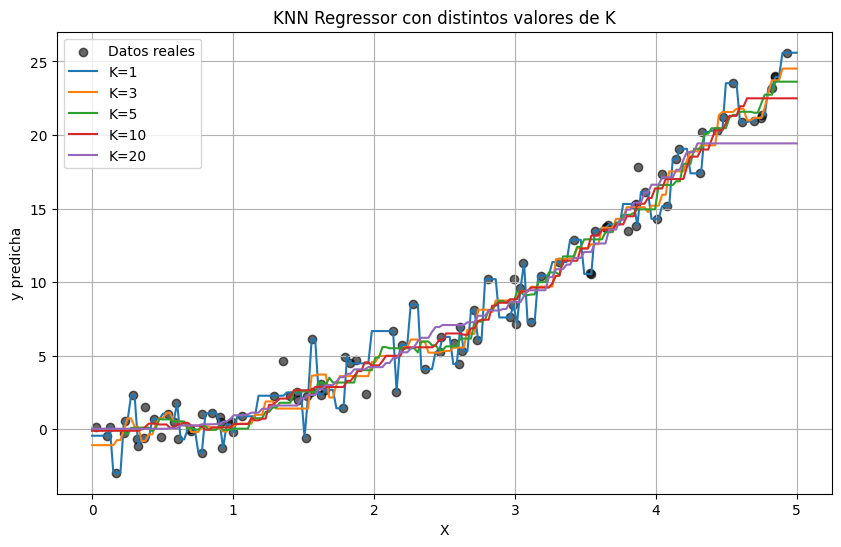

In [11]:
# ============================================================
#  Graficar curvas obtenidas con distintos K
# ============================================================

plt.figure(figsize=(10,6))
plt.scatter(X, y, color="black", label="Datos reales", alpha=0.6)

for k, y_pred_plot in predicciones.items():
    plt.plot(X_plot, y_pred_plot, label=f"K={k}")

plt.title("KNN Regressor con distintos valores de K")
plt.xlabel("X")
plt.ylabel("y predicha")
plt.legend()
plt.grid(True)
plt.show()


,K,MSE,R²
3,10,1.572662,0.967402
4,20,1.606837,0.966694
2,5,1.689874,0.964972
1,3,1.942923,0.959727
0,1,2.478935,0.948617


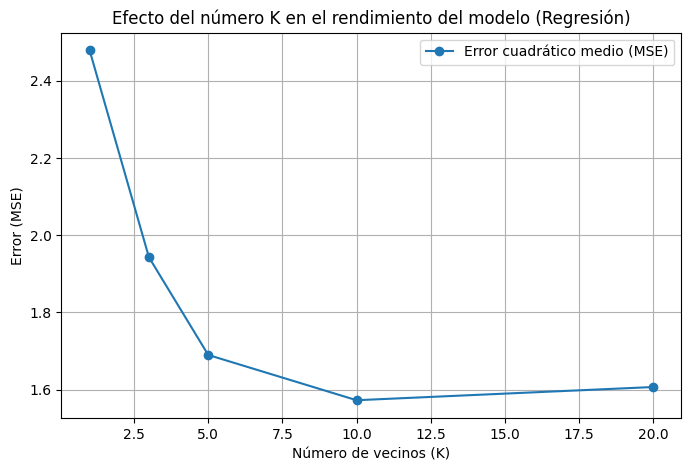

In [12]:
# ============================================================
#  Analizar el efecto de K en el error
# ============================================================

resultados = pd.DataFrame({
    "K": list(errores.keys()),
    "MSE": [v[0] for v in errores.values()],
    "R²": [v[1] for v in errores.values()]
})

display(resultados.sort_values("MSE"))

plt.figure(figsize=(8,5))
plt.plot(resultados["K"], resultados["MSE"], marker='o', label="Error cuadrático medio (MSE)")
plt.title("Efecto del número K en el rendimiento del modelo (Regresión)")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()


## 🧠 Conclusión regresión

- **K pequeño (1–3):** el modelo sigue demasiado el ruido → **sobreajuste**.  
- **K intermedio (5–10):** representa bien la tendencia → equilibrio entre sesgo y varianza.  
- **K grande (20+):** el modelo promedia demasiado → **subajuste**.  

KNN permite aproximar relaciones complejas sin fórmulas explícitas, solo midiendo **distancias** entre ejemplos.
